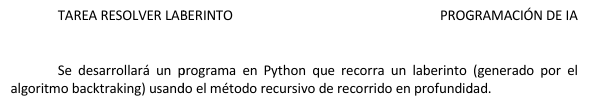

**LINK GITHUB:** https://github.com/Saultr21/IA-Y-BIGDATA/blob/main/PRO/TAREA_2_RECORRIDO%20EN%20PROFUNDIDAD/TAREA_2_RECORRIDO%20EN%20PROFUNDIDAD.ipynb

# 1.2 Funcionamiento correcto del código.

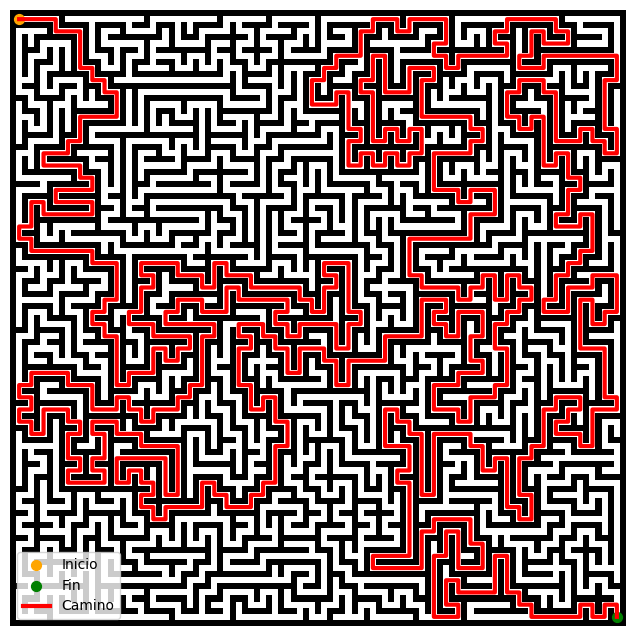

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
# Aumentar el límite de recursión
sys.setrecursionlimit(10**6)
# Función para crear el laberinto utilizando el algoritmo de búsqueda en profundidad
def create_maze(size):
    width, height = size
    maze = np.ones((height, width))  # Crear una matriz llena de 1's, que representan paredes
    # Punto de inicio del laberinto
    start_x, start_y = 1, 1
    maze[start_y, start_x] = 0  # 0's representan caminos
    stack = [(start_x, start_y)]  # Pila para realizar el seguimiento de la generación del laberinto
    directions = [(2, 0), (-2, 0), (0, 2), (0, -2)]  # Direcciones para moverse (en pasos de 2 para saltar paredes)
    # Generar el laberinto
    while stack:
        x, y = stack[-1]
        neighbors = []
        # Buscar vecinos que sean válidos (dentro de límites y que aún sean paredes)
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 < nx < width and 0 < ny < height and maze[ny, nx] == 1:
                neighbors.append((nx, ny))
        if neighbors:
            # Seleccionar un vecino al azar y abrir el camino hacia él
            nx, ny = random.choice(neighbors)
            maze[(y + ny) // 2, (x + nx) // 2] = 0  # Abrir el camino entre la celda actual y el vecino
            maze[ny, nx] = 0  # Establecer el vecino como camino
            stack.append((nx, ny))  # Agregar el vecino a la pila para continuar desde allí
        else:
            stack.pop()  # Si no hay vecinos, retroceder en la pila
    return maze



# Función recursiva para buscar un camino usando el algoritmo de búsqueda en profundidad
def depth_first_search_recursive(maze, current_pos, end_pos, visited=None, path=None):
    if visited is None:
        visited = set()  # Conjunto para registrar las celdas visitadas
    if path is None:
        path = []  # Lista para registrar el camino
    # Si ya se ha alcanzado el destino, retornar el camino
    if current_pos == end_pos:
        path.append(current_pos)
        return path
    # Marcar la celda actual como visitada
    visited.add(current_pos)
    path.append(current_pos)
    x, y = current_pos
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Direcciones para moverse en el laberinto
    # Explorar los vecinos de la celda actual
    for dx, dy in directions:
        neighbor = (x + dx, y + dy)
        if (0 <= neighbor[0] < maze.shape[1] and
                0 <= neighbor[1] < maze.shape[0] and
                maze[neighbor[1], neighbor[0]] == 0 and
                neighbor not in visited):
            result = depth_first_search_recursive(maze, neighbor, end_pos, visited, path)
            if result:  # Si se encontró un camino, retornar
                return result
    # Si no se encontró un camino, retroceder
    path.pop()  # Eliminar la celda actual del camino
    return None  # Indicar que no se encontró un camino válido
# Función para visualizar el laberinto con el camino encontrado
def visualize_maze_with_path(maze, start_pos, end_pos, path):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='binary')  # Muestra el laberinto en escala de grises
    plt.axis('off')
    plt.xlim(-0.5, maze.shape[1] - 0.5)
    plt.ylim(maze.shape[0] - 0.5, -0.5)
    # Marcar los puntos de inicio y final
    plt.scatter(*start_pos[::-1], color='orange', s=50, label='Inicio')  # Punto de inicio
    plt.scatter(*end_pos[::-1], color='green', s=50, label='Fin')        # Punto de destino
    # Dibujar el camino
    if path:
        path_array = np.array(path)
        plt.plot(path_array[:, 0], path_array[:, 1], color='red', linewidth=3, label='Camino')
    plt.legend()
    plt.show()
# Definir el tamaño del laberinto (debe ser impar)
size = (101, 101)  # Cambiado a 101x101
maze = create_maze(size)
# Definir las posiciones de inicio y fin (en el borde del laberinto)
start_pos = (1, 1)   # Inicio en (1, 1)
end_pos = (99, 99)   # Fin en (99, 99)



# Ejecutar la búsqueda en profundidad recursiva para encontrar el camino
path = depth_first_search_recursive(maze, start_pos, end_pos)
# Visualizar el laberinto con el camino encontrado
visualize_maze_with_path(maze, start_pos, end_pos, path)

#  1.3 Explicación del funcionamiento y estructuras creadas

**Importación de librerias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

- numpy: Se utiliza para manejar arreglos y matrices de manera eficiente.
- matplotlib.pyplot: Se utiliza para visualizar el laberinto y el camino encontrado.
- random: Permite seleccionar vecinos al azar al generar el laberinto.
- sys: Se utiliza para ajustar el límite de recursión, lo que permite llamadas recursivas más profundas en el algoritmo de búsqueda.

**Aumento del Límite de Recursión**

In [ ]:
sys.setrecursionlimit(10**6)

Aumenta el límite de recursión a 1,000,000 para permitir una mayor profundidad de recursión en la búsqueda. Esto es útil para laberintos más grandes.

**Creación del Laberinto**

In [ ]:
def create_maze(size):
    width, height = size
    maze = np.ones((height, width))  # Crear una matriz llena de 1's, que representan paredes

- create_maze(size): Función que crea un laberinto basado en el algoritmo de búsqueda en profundidad.
- size es una tupla que define las dimensiones del laberinto. Se inicializa una matriz (maze) llena de 1's, donde 1 representa una pared.

**Inicialización del Laberinto**

In [ ]:
 start_x, start_y = 1, 1
 maze[start_y, start_x] = 0  # 0's representan caminos

Establece el punto de inicio en (1, 1) y lo marca como un camino (0).

**Algoritmo de Generación del Laberinto**

In [ ]:
stack = [(start_x, start_y)]  # Pila para realizar el seguimiento de la generación del laberinto
directions = [(2, 0), (-2, 0), (0, 2), (0, -2)]  # Direcciones para moverse (en pasos de 2 para saltar paredes)

Se utiliza una pila (stack) para realizar un seguimiento de las celdas que se están explorando.
- directions define los pasos de 2 unidades en las direcciones vertical y horizontal para saltar sobre las paredes.

**Generación del Laberinto**

In [ ]:
    while stack:
        x, y = stack[-1]
        neighbors = []

- Mientras haya celdas en la pila, el algoritmo toma la posición de la celda superior de la pila.
- Se inicializa una lista de neighbors para almacenar celdas vecinas válidas.

**Encontrar Vecinos Válidos**

In [ ]:
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 < nx < width and 0 < ny < height and maze[ny, nx] == 1:
                neighbors.append((nx, ny))

- Se exploran las celdas vecinas en las direcciones especificadas.
- Se verifica que cada vecino esté dentro de los límites y sea una pared (1). Si es así, se añade a la lista de vecinos.

**Seleccionar un Vecino y Abrir Caminos**

In [ ]:
        if neighbors:
            # Seleccionar un vecino al azar y abrir el camino hacia él
            nx, ny = random.choice(neighbors)
            maze[(y + ny) // 2, (x + nx) // 2] = 0  # Abrir el camino entre la celda actual y el vecino
            maze[ny, nx] = 0  # Establecer el vecino como camino
            stack.append((nx, ny))  # Agregar el vecino a la pila para continuar desde allí

- Si hay vecinos válidos, se selecciona uno al azar y se abre el camino hacia él, marcando la celda intermedia entre la celda actual y el vecino como un camino (0).
- Luego, se añade el vecino a la pila para continuar la exploración desde esa celda.

**Retroceder si No Hay Vecinos**

In [ ]:
        else:
            stack.pop()  # Si no hay vecinos, retroceder en la pila

Si no hay vecinos disponibles, se hace "pop" en la pila, retrocediendo al último punto explorado.

**Retorno del Laberinto Generado**

In [ ]:
    return maze

Al final, se retorna el laberinto generado.

**Búsqueda del Camino (DFS Recursivo)**

In [ ]:
def depth_first_search_recursive(maze, current_pos, end_pos, visited=None, path=None):
    if visited is None:
        visited = set()  # Conjunto para registrar las celdas visitadas
    if path is None:
        path = []  # Lista para registrar el camino

- depth_first_search_recursive(maze, current_pos, end_pos): Función para encontrar un camino desde current_pos hasta end_pos usando búsqueda en profundidad.
- Se inicializan los conjuntos visited y path para seguir el rastro de las celdas visitadas y el camino encontrado, respectivamente.

**Condición de Éxito**

In [ ]:
    if current_pos == end_pos:
        path.append(current_pos)
        return path

Si se alcanza la posición final, se añade a la lista de path y se devuelve.

**Marcar la Celda Actual**

In [ ]:
    visited.add(current_pos)
    path.append(current_pos)
    x, y = current_pos
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Direcciones para moverse en el laberinto

- Marca la celda actual como visitada y la añade al camino.
- Define las direcciones para moverse (arriba, derecha, abajo, izquierda).

**Explorar Vecinos**

In [ ]:
    for dx, dy in directions:
        neighbor = (x + dx, y + dy)
        if (0 <= neighbor[0] < maze.shape[1] and
                0 <= neighbor[1] < maze.shape[0] and
                maze[neighbor[1], neighbor[0]] == 0 and
                neighbor not in visited):
            result = depth_first_search_recursive(maze, neighbor, end_pos, visited, path)
            if result:  # Si se encontró un camino, retornar
                return result

- Se exploran los vecinos de la celda actual. Si un vecino es un camino (0) y no ha sido visitado, se llama recursivamente a la función con esa celda como la nueva posición actual.
- Si se encuentra un camino, se devuelve inmediatamente.

**Retroceso si No se Encuentra Camino**

In [ ]:
    path.pop()  # Eliminar la celda actual del camino
    return None  # Indicar que no se encontró un camino válido

Si no se encuentra un camino, se hace "pop" en el camino, eliminando la celda actual, y se devuelve None.

**Visualización del Laberinto**

In [ ]:
def visualize_maze_with_path(maze, start_pos, end_pos, path):
    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap='binary')  # Muestra el laberinto en escala de grises
    plt.axis('off')
    plt.xlim(-0.5, maze.shape[1] - 0.5)
    plt.ylim(maze.shape[0] - 0.5, -0.5)

- visualize_maze_with_path(maze, start_pos, end_pos, path): Función para visualizar el laberinto y el camino encontrado.
- Utiliza Matplotlib para mostrar el laberinto en una figura de 10x10 pulgadas. El laberinto se visualiza en escala de grises.

**Marcar Inicio y Fin**

In [ ]:
    plt.scatter(*start_pos[::-1], color='orange', s=50, label='Inicio')  # Punto de inicio
    plt.scatter(*end_pos[::-1], color='green', s=50, label='Fin')        # Punto de destino

Se marcan los puntos de inicio (en naranja) y de fin (en verde) en el laberinto.

**Dibujar el Camino Encontrado**

In [ ]:
    if path:
        path_array = np.array(path)
        plt.plot(path_array[:, 0], path_array[:, 1], color='red', linewidth=2, label='Camino')

Si hay un camino encontrado, se convierte en un arreglo NumPy y se dibuja en rojo en el laberinto.

**Mostrar la Leyenda y la Figura**

In [ ]:
    plt.legend()
    plt.show()

Se añade una leyenda y se muestra la figura.

**Definición del Tamaño del Laberinto y Ejecución**

In [ ]:
size = (101, 101)  # Cambiado a 101x101
maze = create_maze(size)

# 1.4 Modifica la matriz de movimientos para permitir saltos en diagonal y añadir más muros (de forma aleatoria) en el interior, olvidar un porcentaje de puntos por dónde se ha pasado.

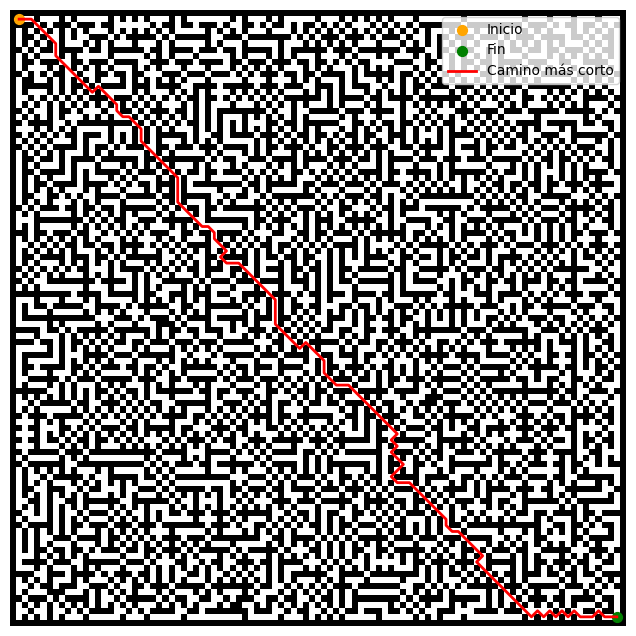

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from collections import deque

# Aumentar el límite de recursión
sys.setrecursionlimit(10**6)

# Función para crear el laberinto utilizando el algoritmo de búsqueda en profundidad
def create_maze(size, extra_walls=100):
    width, height = size
    maze = np.ones((height, width))  # Crear una matriz llena de 1's, que representan paredes
    # Punto de inicio del laberinto
    start_x, start_y = 1, 1
    maze[start_y, start_x] = 0  # 0's representan caminos
    stack = [(start_x, start_y)]  # Pila para realizar el seguimiento de la generación del laberinto
    directions = [(2, 0), (-2, 0), (0, 2), (0, -2), (2, 2), (-2, -2), (2, -2), (-2, 2)]  # Añadir direcciones diagonales

    # Generar el laberinto
    while stack:
        x, y = stack[-1]
        neighbors = []
        # Buscar vecinos que sean válidos (dentro de límites y que aún sean paredes)
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 < nx < width and 0 < ny < height and maze[ny, nx] == 1:
                neighbors.append((nx, ny))
        if neighbors:
            # Seleccionar un vecino al azar y abrir el camino hacia él
            nx, ny = random.choice(neighbors)
            maze[(y + ny) // 2, (x + nx) // 2] = 0  # Abrir el camino entre la celda actual y el vecino
            maze[ny, nx] = 0  # Establecer el vecino como camino
            stack.append((nx, ny))  # Agregar el vecino a la pila para continuar desde allí
        else:
            stack.pop()  # Si no hay vecinos, retroceder en la pila

    # Añadir muros adicionales al azar sin bloquear todos los caminos
    for _ in range(extra_walls):
        wx, wy = random.randint(1, width - 2), random.randint(1, height - 2)
        if (wx % 2 == 1 and wy % 2 == 1):  # Solo añadir muros en celdas que podrían ser caminos
            maze[wy, wx] = 1

    return maze

# Función para encontrar el camino más corto usando el algoritmo de búsqueda en anchura
def bfs_shortest_path(maze, start_pos, end_pos):
    queue = deque([start_pos])
    visited = set()
    visited.add(start_pos)
    parent_map = {start_pos: None}  # Mapa para rastrear el camino

    directions = [(1, 1), (-1, -1), (1, -1), (-1, 1),(0, 1), (1, 0), (0, -1), (-1, 0)]  # Movimientos diagonales incluidos

    while queue:
        current = queue.popleft()
        if current == end_pos:  # Si se llega al destino
            break
        x, y = current

        # Explorar vecinos
        for dx, dy in directions:
            neighbor = (x + dx, y + dy)
            if (0 <= neighbor[0] < maze.shape[1] and
                    0 <= neighbor[1] < maze.shape[0] and
                    maze[neighbor[1], neighbor[0]] == 0 and
                    neighbor not in visited):
                visited.add(neighbor)
                queue.append(neighbor)
                parent_map[neighbor] = current  # Registrar el padre del vecino

    # Reconstruir el camino
    path = []
    if current == end_pos:  # Verificar si se encontró un camino
        while current is not None:
            path.append(current)
            current = parent_map[current]
        path.reverse()  # Invertir el camino para que vaya desde el inicio al fin

    return path

# Función para visualizar el laberinto con el camino encontrado
def visualize_maze_with_path(maze, start_pos, end_pos, path):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='binary')  # Muestra el laberinto en escala de grises
    plt.axis('off')
    plt.xlim(-0.5, maze.shape[1] - 0.5)
    plt.ylim(maze.shape[0] - 0.5, -0.5)
    # Marcar los puntos de inicio y final
    plt.scatter(*start_pos[::-1], color='orange', s=50, label='Inicio')  # Punto de inicio
    plt.scatter(*end_pos[::-1], color='green', s=50, label='Fin')        # Punto de destino
    # Dibujar el camino
    if path:
        path_array = np.array(path)
        plt.plot(path_array[:, 0], path_array[:, 1], color='red', linewidth=2, label='Camino más corto')
    plt.legend()
    plt.show()

# Definir el tamaño del laberinto (debe ser impar)
size = (101, 101)  # Cambiado a 101x101
maze = create_maze(size, extra_walls=20)  # Aumentar muros aleatorios

# Definir las posiciones de inicio y fin (en el borde del laberinto)
start_pos = (1, 1)   # Inicio en (1, 1)
end_pos = (99, 99)   # Fin en (99, 99)

# Ejecutar la búsqueda del camino más corto
shortest_path = bfs_shortest_path(maze, start_pos, end_pos)

# Visualizar el laberinto con el camino más corto encontrado
visualize_maze_with_path(maze, start_pos, end_pos, shortest_path)


**Cambios realizados:**

**Se han añadido direcciones diagonales en la variable directions durante la creación del laberinto.**

In [ ]:
directions = [(2, 0), (-2, 0), (0, 2), (0, -2), (2, 2), (-2, -2), (2, -2), (-2, 2)]  # Direcciones diagonales añadidas

**Se ha añadido un parámetro extra_walls en la función create_maze para permitir la adición de muros aleatorios después de generar el laberinto.**

In [ ]:
def create_maze(size, extra_walls=100):

**Se incluye un bucle que añade muros adicionales aleatorios al laberinto.**

In [ ]:
for _ in range(extra_walls):
    wx, wy = random.randint(1, width - 2), random.randint(1, height - 2)
    if (wx % 2 == 1 and wy % 2 == 1):  # Solo añadir muros en celdas que podrían ser caminos
        maze[wy, wx] = 1

**La función depth_first_search_recursive ahora también considera movimientos diagonales.**

In [ ]:
directions = [(1, 1), (-1, -1), (1, -1), (-1, 1), (0, 1), (1, 0), (0, -1), (-1, 0) ]  # Direcciones diagonales añadidas antes para darle preferencia

**Se ha añadido la función forget_path_points que elimina un porcentaje de los puntos en el camino encontrado.**

In [ ]:
def forget_path_points(path, forget_percent=20):

# 1.5 Recorrido en abanico iterativo, indica estructuras creadas.

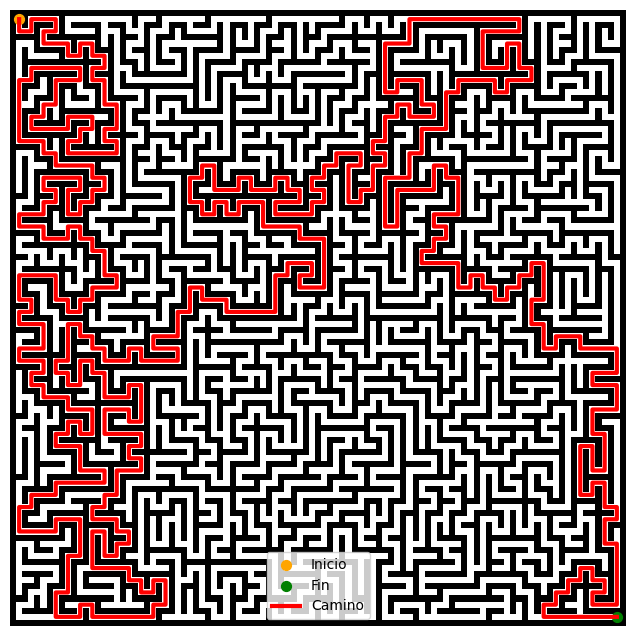

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys
from collections import deque

# Aumentar el límite de recursión (no es necesario para el recorrido iterativo, pero se mantiene por si acaso)
sys.setrecursionlimit(10**6)

# Función para crear el laberinto utilizando el algoritmo de búsqueda en profundidad
def create_maze(size):
    width, height = size
    maze = np.ones((height, width))  # Crear una matriz llena de 1's, que representan paredes
    # Punto de inicio del laberinto
    start_x, start_y = 1, 1
    maze[start_y, start_x] = 0  # 0's representan caminos
    stack = [(start_x, start_y)]  # Pila para realizar el seguimiento de la generación del laberinto
    directions = [(2, 0), (-2, 0), (0, 2), (0, -2)]  # Direcciones para moverse (en pasos de 2 para saltar paredes)

    # Generar el laberinto
    while stack:
        x, y = stack[-1]
        neighbors = []
        # Buscar vecinos que sean válidos (dentro de límites y que aún sean paredes)
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 < nx < width and 0 < ny < height and maze[ny, nx] == 1:
                neighbors.append((nx, ny))
        if neighbors:
            # Seleccionar un vecino al azar y abrir el camino hacia él
            nx, ny = random.choice(neighbors)
            maze[(y + ny) // 2, (x + nx) // 2] = 0  # Abrir el camino entre la celda actual y el vecino
            maze[ny, nx] = 0  # Establecer el vecino como camino
            stack.append((nx, ny))  # Agregar el vecino a la pila para continuar desde allí
        else:
            stack.pop()  # Si no hay vecinos, retroceder en la pila
    return maze

# Función para buscar un camino usando el algoritmo de recorrido en abanico iterativo (BFS)
def breadth_first_search(maze, start_pos, end_pos):
    queue = deque([start_pos])  # Cola para almacenar las posiciones a explorar
    visited = set([start_pos])  # Conjunto para registrar las celdas visitadas
    parent = {start_pos: None}  # Diccionario para almacenar el camino (nodo actual -> padre)

    # Mientras haya posiciones en la cola
    while queue:
        current_pos = queue.popleft()
        if current_pos == end_pos:
            break  # Si se ha alcanzado el destino, finalizar

        x, y = current_pos
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Direcciones para moverse en el laberinto

        # Explorar los vecinos de la celda actual
        for dx, dy in directions:
            neighbor = (x + dx, y + dy)
            if (0 <= neighbor[0] < maze.shape[1] and
                    0 <= neighbor[1] < maze.shape[0] and
                    maze[neighbor[1], neighbor[0]] == 0 and
                    neighbor not in visited):
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current_pos  # Registrar el padre de la celda vecina

    # Reconstruir el camino desde el destino al inicio
    path = []
    step = end_pos
    while step is not None:
        path.append(step)
        step = parent[step]
    path.reverse()  # Invertir el camino para obtenerlo desde el inicio al destino

    return path if path[0] == start_pos else None  # Retornar el camino si se alcanzó el inicio

# Función para visualizar el laberinto con el camino encontrado
def visualize_maze_with_path(maze, start_pos, end_pos, path):
    plt.figure(figsize=(8, 8))
    plt.imshow(maze, cmap='binary')  # Muestra el laberinto en escala de grises
    plt.axis('off')
    plt.xlim(-0.5, maze.shape[1] - 0.5)
    plt.ylim(maze.shape[0] - 0.5, -0.5)
    # Marcar los puntos de inicio y final
    plt.scatter(*start_pos[::-1], color='orange', s=50, label='Inicio')  # Punto de inicio
    plt.scatter(*end_pos[::-1], color='green', s=50, label='Fin')        # Punto de destino
    # Dibujar el camino
    if path:
        path_array = np.array(path)
        plt.plot(path_array[:, 0], path_array[:, 1], color='red', linewidth=3, label='Camino')
    plt.legend()
    plt.show()

# Definir el tamaño del laberinto (debe ser impar)
size = (101, 101)  # Cambiado a 101x101
maze = create_maze(size)

# Definir las posiciones de inicio y fin (en el borde del laberinto)
start_pos = (1, 1)   # Inicio en (1, 1)
end_pos = (99, 99)   # Fin en (99, 99)

# Ejecutar el recorrido en abanico iterativo para encontrar el camino
path = breadth_first_search(maze, start_pos, end_pos)

# Visualizar el laberinto con el camino encontrado
visualize_maze_with_path(maze, start_pos, end_pos, path)


Estructuras creadas:
- queue (cola): Es una estructura de deque que almacena las posiciones a explorar en el recorrido en abanico. Las posiciones se agregan al final de la cola y se eliminan del frente, asegurando que el recorrido sea en abanico.

- visited (conjunto): Un conjunto para registrar las celdas que ya han sido visitadas y evitar ciclos. Esto ayuda a no visitar la misma celda dos veces.

- parent (diccionario): Almacena la relación de cada celda con su "padre" (la celda desde la que se alcanzó), permitiendo reconstruir el camino desde el destino hasta el inicio al finalizar la búsqueda.

Esta implementación de BFS evita el uso de recursión y construye el camino completo mediante estructuras iterativas.

# 1.6 Comparación, dificultades, conclusiones y mejoras


1. Estrategia de Búsqueda
- **DFS Recursivo**: Este algoritmo explora en profundidad, lo que significa que sigue explorando cada camino posible desde el punto de inicio hasta el final antes de retroceder. Esto lo hace apropiado para encontrar caminos en laberintos que no son necesariamente el más corto, ya que se centra en explorar una ruta hasta llegar al final o quedar sin opciones.
- **BFS Iterativo**: Explora en abanico, analizando todas las celdas cercanas al punto de inicio antes de expandirse. Esta estrategia es particularmente útil cuando se necesita encontrar el camino más corto en un laberinto (en términos de número de pasos), ya que cada paso abarca todas las celdas accesibles en un nivel antes de pasar al siguiente.

2. Estructuras Utilizadas
- **DFS Recursivo**: Utiliza una pila implícita a través de la llamada recursiva, junto con una lista `path` y un conjunto `visited`. La pila de llamadas en la recursión puede crecer considerablemente en laberintos grandes, lo cual podría llevar a un desbordamiento de pila.
- **BFS Iterativo**: Utiliza una cola explícita (`queue`) para manejar el orden de expansión en abanico. También emplea un conjunto `visited` para evitar volver a visitar celdas y un diccionario `parent` para rastrear el camino. La cola asegura un manejo de la memoria más controlado, lo que evita problemas de desbordamiento de pila.

3. Complejidad Espacial
- **DFS Recursivo**: La memoria está dominada por la profundidad máxima de la recursión. En laberintos grandes y profundos, esto puede causar problemas de rendimiento y posibles errores de desbordamiento de pila.
- **BFS Iterativo**: El consumo de memoria está relacionado con el tamaño de la cola, que puede volverse grande si el laberinto es ancho. Sin embargo, el uso de una cola iterativa y el almacenamiento de padres permite manejar laberintos grandes sin riesgo de desbordamiento de pila.

4. Complejidad Temporal
- **DFS Recursivo**: La complejidad depende del tamaño del laberinto; en el peor caso, explora todas las celdas. No garantiza encontrar el camino más corto.
- **BFS Iterativo**: Al analizar cada nivel de celdas antes de pasar al siguiente, encuentra el camino más corto en términos de número de celdas exploradas, lo que lo hace más eficiente para hallar soluciones óptimas.

5. Riesgo de Ciclos o Caminos Innecesarios
- **DFS Recursivo**: Sin la estructura adecuada, puede intentar caminos ya explorados, aunque el uso de `visited` ayuda a evitar esto. Si el laberinto tiene caminos complejos, DFS podría generar soluciones innecesariamente largas o incluso sin salida.
- **BFS Iterativo**: Debido a su estructura en abanico, evita revisitar celdas y es menos propenso a quedar atrapado en ciclos. Siempre encontrará el camino más corto si existe, aunque la exploración a veces es más lenta.

Dificultades al Implementar

- **DFS Recursivo**:
  - Riesgo de desbordamiento de pila en laberintos grandes.
  - Complejidad para gestionar retrocesos y mantener un camino continuo al retroceder.
  - No garantiza la solución más corta.

- **BFS Iterativo**:
  - Requiere una estructura de datos adicional (`queue`) y un diccionario (`parent`) para reconstruir el camino.
  - La implementación y mantenimiento de la cola y el rastreo de padres pueden complicar el código si el laberinto es dinámico o cambia durante la búsqueda.
  - El crecimiento en abanico puede requerir memoria adicional, especialmente en laberintos grandes y muy abiertos.

Conclusiones

- **DFS** es adecuado para laberintos pequeños o para situaciones en las que se necesita una solución rápida sin importar si es la más corta. Es un enfoque intuitivo y relativamente sencillo de implementar para encontrar cualquier camino hasta el final.
  
- **BFS** es preferible cuando se necesita encontrar el camino más corto, en laberintos grandes o en casos donde se debe evitar un desbordamiento de pila. Su estructura iterativa lo hace más robusto para laberintos complejos y de gran tamaño.

En general, el **BFS** es más versátil y eficiente para encontrar soluciones óptimas, mientras que **DFS** es útil para exploración rápida o en sistemas con limitaciones de memoria o complejidad del algoritmo.
